# Week3授業前課題2 住宅価格を予測しよう

## この課題の目的

- データ分析の基本的な流れを知る
- PandasやMatplotlibに慣れる
- Kaggleのカーネルを利用する

## エイムズ市の住宅価格

アイオワ州エイムズ市の住宅価格データセットを使い、基本的なデータの扱い方を学んでいきます。

住宅に関する79種類もの説明変数が用意されているため、それらと価格との関係を探索していきましょう。

エイムズがどのような街なのかもWikipediaなどで確認しておくと良いでしょう。

[Ames, Iowa - Wikipedia](https://en.wikipedia.org/wiki/Ames,_Iowa)

## Kaggleのカーネル

Kaggleでは「カーネル」としていろいろな人がデータ探索（EDA）を行ったコードが共有されています。良いEDAをたくさん見て、ノウハウを吸収していきましょう。今回の課題をやる上でも参考にしたり、課題になっていないことに挑戦したりしてください。

これ以降Kaggleを利用していきますので、アカウントを作成してください。

＜参考カーネル＞

[Comprehensive data exploration with Python | Kaggle](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python)
（まずはここから）

[House Prices : EDA to ML (Beginner) | Kaggle](https://www.kaggle.com/dejavu23/house-prices-eda-to-ml-beginner)

[A Home for Pandas and Sklearn: Beginner How-Tos | Kaggle](https://www.kaggle.com/timolee/a-home-for-pandas-and-sklearn-beginner-how-tos)

## データセットの準備
データセットはKaggleからダウンロードします。

[House Prices: Advanced Regression Techniques | Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

上記URLを開き、Dataのページへ移動してください。

![](image/image2_1.png)

この中のtrain.csvを使用します。これをダウンロードし、Jupyter Notebookで使っているディレクトリに置いてください。

## 【課題1】 データセットの取得

pd.read_csv()を使用して、変数に格納してください。

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


## 【課題2】 データセット自体の調査

KaggleのOverviewページや、Dataページの「Data fields」などを読みながら、どのようなデータセットかを説明してください。前回扱ったirisデータセットとの比較もすると良いでしょう。

アイオワ州エイムズ市の住宅価格の予測を行う。住宅に割り当てられているIdに加え、立地条件や外装、内装など住宅に関する79個の説明変数と、目的変数である販売価格がデータとなっている。

## データの概観

## 【課題3】 データの確認

「Week3授業前課題1アヤメを分析しよう」と同様に、データを確認していきます。コードとマークダウンを組み合わせてレポートしてください。

- 各特徴量がどういったものかを見る。（数値データか文字データなど）
- 今回の目的変数はどの列か確認する。
- 特徴量の平均値と標準偏差、四分位数を一度に表示させる。

### ・各特徴量がどういったものか見る。



In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

説明変数の各特徴量は、浮動小数点型が3個、整数型が33個、文字型が43個である。また、Idと目的変数は整数型である。

### ・目的変数はどの列が確認する。
「SalePrice」の列である。

### ・特徴量の平均値と標準偏差、四分位を一度に表示させる。

In [3]:
df_describe = df.describe()
df_describe

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


要素数、平均、標準偏差、最小値、第一四分位数、第二四分位数、第三四分位数、最大値の順に表示されている。

## 【課題4】 欠損値への対応

欠損値に関して以下のことを行い、レポートしてください。

- 各特徴量の欠損値の有無を確認する。

欠損値の確認にはmissingnoというライブラリを活用しましょう。このライブラリにより欠損値の有無が可視化できます。インストールや使い方に関しては以下のページをご覧ください。

[ResidentMario/missingno: Missing data visualization module for Python.](https://github.com/ResidentMario/missingno)

- 欠損値が何パーセント含まれるかを確認する。

（例）

| 　 | Total | missing_ratio |
|:---:|:---:|:---:|
| PoolQC |1453  |0.995205  |
| MiscFeature |　  |　  |
| Alley |　  |　  |
| Fence |　  |　  |
|:  |:  |　 |

- 5つ以上欠損値がある特徴量（列）は削除する。
- 欠損値があるサンプル（行）は削除する。

### ・各特徴量の欠損値の有無を確認する。

In [4]:
import missingno as msno

#非欠損値の数の棒グラフを表示
msno.bar(df);

各特徴量において非欠損値の数の棒グラフが表示されている。今回は1460行あるので、それ未満の場合は欠損値が含まれている。

### ・欠損値が何パーセント含まれるかを確認する。

In [5]:
#欠損値の数を数え、降順にソート
total = df.isnull().sum().sort_values(ascending=False)

#欠損値の割合を計算し、降順にソート
missing_ratio = ((df.isnull().sum() / df.isnull().count()) * 100).sort_values(ascending=False)

#DataFrameを作成(1~20番目まで表示)
pd.concat([total, missing_ratio], axis=1, keys=['Total', 'missing_ratio']).head(20)

,Total,missing_ratio
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageCond,81,5.547945
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


合計19の特徴量において欠損値が含まれており、その内一番欠損値が含まれているのは「PoolQC」であり、約99.5%が欠損値である。

### ・5つ以上欠損値がある特徴量(列)は削除する。

In [6]:
#axis=1で列、threshで非欠損値の数を指定
df_nan_5 = df.dropna(axis=1, thresh=len(df)-5)
df_nan_5

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,9,50,RM,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2008,WD,Normal,118000


欠損値が5つ以上含まれている特徴量(列)は合計18あり、上記の欠損値割合の表を見ても、同様のことが読み取れる。

### ・欠損値があるサンプル(行)は削除する。

In [7]:
df_nan = df.dropna()
df_nan

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


欠損値が含まれていないサンプル(行)は0である。

## 目的変数

次は目的変数がどのような分布を持っているか確認していきます。

## 【課題5】 用語の調査

以下の２つの単語を知る必要があります。これらを調査してまとめてください。

- 尖度
- 歪度

### ・尖度
分布が正規分布からどれだけ尖っているかを表す統計量で、山の尖り度と裾の広がり度を示す。確率変数 $ X $ が従う尖度は、平均値を $ \mu $ 、標準偏差を $ \sigma $ とすると、   
$ 尖度 = \frac{E[(X - \mu)^4]}{\sigma^4} -3 = \frac{1}{n}{\sum}(\frac{x^{}_{i}-\mu}{\sigma})^4 -3 $    
となる。正規分布より尖った分布(データが平均付近に集中し、分布の裾が重い)のときには正の値を、正規分布より扁平な分布(データが平均付近から散らばり、
分布の裾が重い)のときには負の値をとる。正規分布の場合は0になる。

### ・歪度
分布から正規分布がどれだけ歪んでいるかを表す統計量で、左右対称性を示す指標のこと。確率変数 $ X $ が従う歪度は、平均値を $ \mu $ 、標準偏差を $ \sigma $ とすると、   
$ 歪度 = \frac{E[(X - \mu)^3]}{\sigma^3} = \frac{1}{n}{\sum}(\frac{x^{}_{i}-\mu}{\sigma})^3 $   
となる。右裾に長い、もしくは、右に歪んだ、もしくは、左に偏った分布の時には正の値をとり、左裾に長い、もしくは、左に歪んだ、もしくは、右に偏った分布の時には負の値をとる

## 【課題6】 分布の確認

- seabornのsns.distplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。
- 目的変数に対して対数変換を行う。
- 対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。

対数変換の前後での変化を「正規分布」という言葉を含めて説明してください。このように加工することで予測時の精度を上げることができます。

### ・seabornのsns.distplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。

歪度： 1.8828757597682129
尖度： 6.536281860064529


/Users/yuhisoejima/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


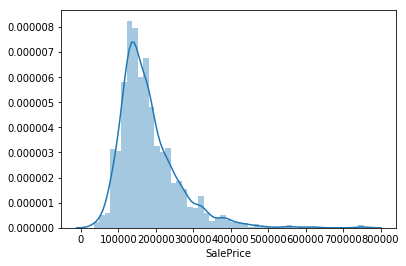

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#目的変数の分布を出力
sns.distplot(df['SalePrice']);

#歪度、尖度の出力
print('歪度：', df['SalePrice'].skew())
print('尖度：', df['SalePrice'].kurt())

### ・目的変数に対して対数変換を行う。

In [9]:
#対数変換
df_saleprice_log = df['SalePrice'].apply(np.log)

### ・対数変換したものに対して分布を表示し、「尖度と」「歪度」も算出する。

/Users/yuhisoejima/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


歪度： 0.12133506220520406
尖度： 0.8095319958036296


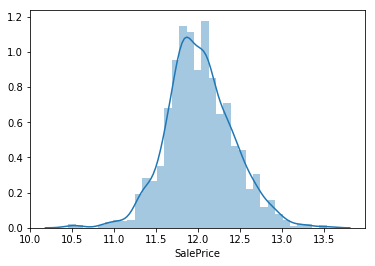

In [10]:
#対数変換した目的変数の分布の出力
sns.distplot(df_saleprice_log);

#歪度と尖度の出力
print('歪度：', df_saleprice_log.skew())
print('尖度：', df_saleprice_log.kurt())

対数変換前の目的変数の分布は左に偏った、かつ尖った分布となっており、歪度が1.88、尖度が6.54であることからも読み取れる。
対数変換後の目的変数の分布は正規分布に近い形となり、歪度が0.12、尖度が0.81であることからも読み取れる。

## 特徴量

## 【課題7】 相関係数の確認

特徴量の確認をしていきます。それぞれに対してマークダウンで説明や考察を書いてください。

- 相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。
- 目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。
- 選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。
- 選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。

補足

重回帰分析などで予測する場合、相関が高すぎる特徴量の組み合わせがあると予測に悪影響が出ることがあります。このような場合の簡単な対処方法として、そういった特徴量の組みを探し出して、１つに絞るということがあります。

### ・相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


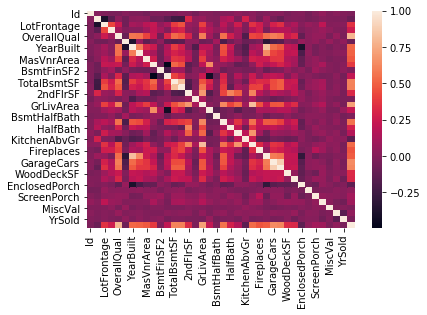

In [11]:
#相関係数行列を作成
df_corr = df.corr()

#ヒートマップの作成
sns.heatmap(df_corr);
df_corr

「TotalBsmtSF」と「1stFlrSF」、「GarageCars」と「GarageArea」、「GrLivArea」と「TotRmsAbvGrd」、「YearBuilt」と「GarageYrBlt」が相関関係が高いように見える。

In [12]:
#目的変数との相関係数をsortして降順に並び替え
df_corr['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

降順にソートすると、「OverallQual」,「GrLivArea」,「GarageCars」,「GarageArea」,「TotalBsmtSF」,「1stFlrSF」,「FullBath」,「TotRmsAbvGrd」,「YearBuilt」,「YearRemodAdd」が目的変数との相関係数が高いことが分かった。

In [13]:
#選んだ特徴量リスト
df_10_list = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 
              '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']

#選んだ特徴量のみ抽出
df_10 = df.loc[:, df_10_list]
df_10

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,7,1710,2,548,856,856,2,8,2003,2003
1,6,1262,2,460,1262,1262,2,6,1976,1976
2,7,1786,2,608,920,920,2,6,2001,2002
3,7,1717,3,642,756,961,1,7,1915,1970
4,8,2198,3,836,1145,1145,2,9,2000,2000
5,5,1362,2,480,796,796,1,5,1993,1995
6,8,1694,2,636,1686,1694,2,7,2004,2005
7,7,2090,2,484,1107,1107,2,7,1973,1973
8,7,1774,2,468,952,1022,2,8,1931,1950
9,5,1077,1,205,991,1077,1,5,1939,1950


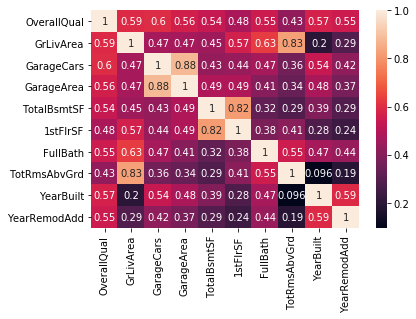

In [14]:
#選んだ特徴量リストの相関係数行列ヒートマップ
sns.heatmap(df_10.corr(), annot=True);

ヒートマップより、「GrLivArea」と「TotRmsAbvGrd」、「GarageCars」と「GarageArea」、「TotalBsmtSF」と「1stFlrSF」の組み合わせは相関係数が0.8以上であるということが読み取れる。

### ・選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。

OverallQual：全体的な素材と仕上がりの品質を10段階で評価(10が一番良く、1が一番悪い)   
GrLivArea：地上の生活空間の大きさ(平方フィート)   
GarageCars：ガレージに収容可能な車の数   
GarageArea：ガレージの大きさ(平方フィート)   
TotalBsmtSF：地下の全体の大きさ(平方フィート)   
1stFlrSF：1階の大きさ(平方フィート)   
FullBath：地上のフルバスルームの数   
TotRmsAbvGrd：地上にある総部屋数(バスルームを除く)   
YearBuilt：建てられた年   
YearRemodAdd：改装した年(改装や増築を行っていなければ、建てられた年と同じ)

### ・選んだ10個の特徴量の中でお互いの相関関係が高い組み合わせを3つ探し出す。

ヒートマップより、「GrLivArea」と「TotRmsAbvGrd」、「GarageCars」と「GarageArea」、「TotalBsmtSF」と「1stFlrSF」の3つの組み合わせが相関係数が高い。

## 【課題8】 重要度の算出

ランダムフォレストという機械学習手法を用いることで、重要度の値を算出できます。この値は推定を行った時に、各特徴量がどれだけ推定値に寄与しているかを表すものです。ランダムフォレストは推定によく使われる手法ですが、ここでは推定自体が目的ではなく、あくまで重要度を算出するために使います。

In [15]:
#目的変数と相関関係の高い特徴量10個で実施
from sklearn.ensemble import RandomForestRegressor

y = df['SalePrice']

model = RandomForestRegressor()
model.fit(df_10, y)

#重要度の算出
for i in range(10):
    print(df_10_list[i], model.feature_importances_[i])

OverallQual 0.6033269520549813
GrLivArea 0.13582557134037732
GarageCars 0.024558459028271522
GarageArea 0.044139231061959806
TotalBsmtSF 0.06388712751648866
1stFlrSF 0.03893182984422178
FullBath 0.02334933978920975
TotRmsAbvGrd 0.01476051115958445
YearBuilt 0.031570883174399315
YearRemodAdd 0.019650095030506014


/Users/yuhisoejima/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## 【課題9】 さらなる探索

Kaggleのカーネルを参考に、ここまでの課題にないことにも挑戦し、ノートブックにまとめてください。

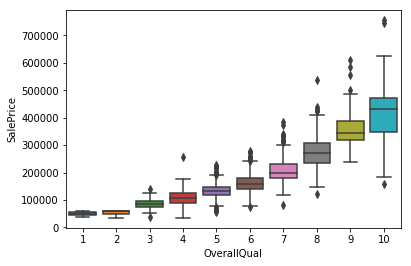

In [16]:
#OverallQualとSalePriceの箱ひげ図
sns.boxplot(x=df['OverallQual'], y=df['SalePrice']);

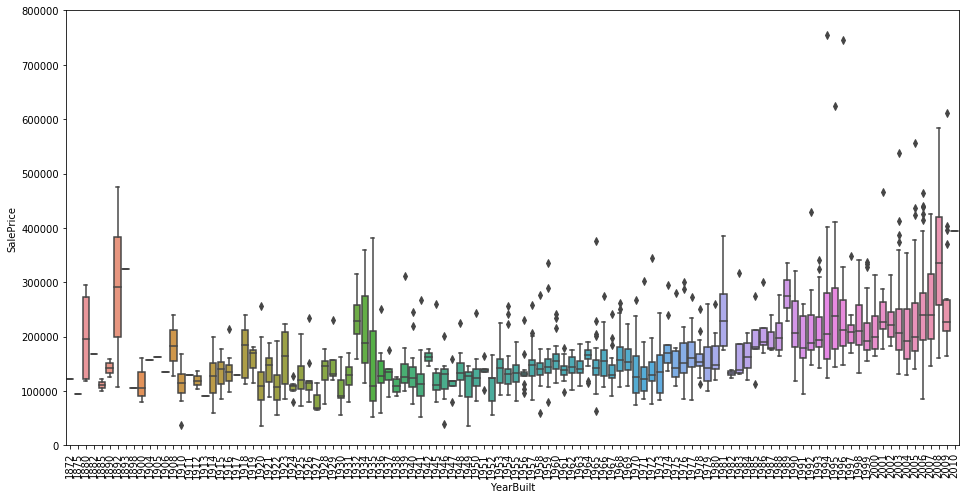

In [19]:
#YearBuiltとSalePriceの箱ひげ図
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=df['YearBuilt'], y=df['SalePrice'])
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

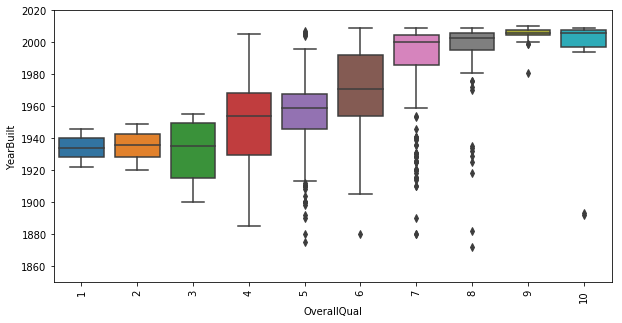

In [20]:
f, ax = plt.subplots(figsize=(10, 5))
fig = sns.boxplot(x=df['OverallQual'], y=df['YearBuilt'])
fig.axis(ymin=1850, ymax=2020);
plt.xticks(rotation=90);

以上の箱ひげ図から読み取れることは、建物の築年数よりも、建物の質が良いほうが価格との相関性があることがわかる。また、建てられた年が新しい建物ほど品質の評価が高い傾向にある。